In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from glob import glob
import matplotlib as mpl
import os

# Activar LaTeX para todo el texto
mpl.rcParams['text.usetex'] = True

# Elegir tipo de fuente (opcional)
mpl.rcParams['font.family'] = 'serif'       # fuente LaTeX clásica
mpl.rcParams['font.serif'] = ['Computer Modern Roman']  # fuente por defecto de LaTeX

# Tamaños por defecto
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12

mpl.rcParams['ytick.labelsize'] = 12

In [158]:
problem = 'p6'
folder = './backup/'+problem

policy_paths = glob(os.path.join(folder, '*.mat'))
policy_paths


['./backup/p6\\1_fixed.mat',
 './backup/p6\\1_proportional.mat',
 './backup/p6\\2_fixed.mat',
 './backup/p6\\2_proportional.mat']

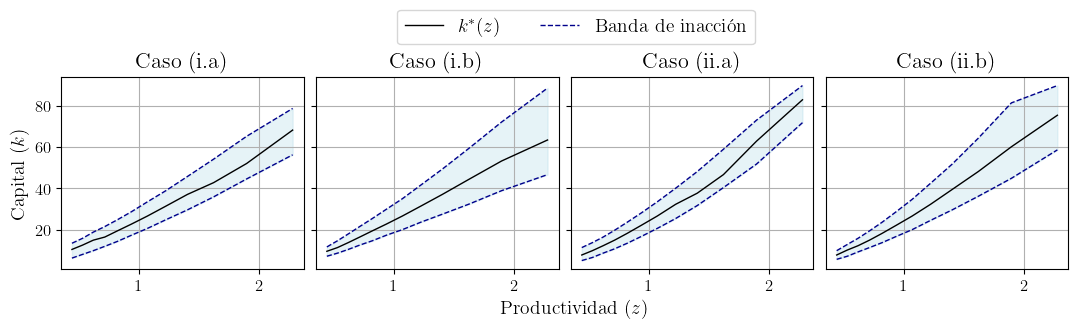

In [ ]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(13, 2.5), gridspec_kw={'wspace':0.05}, dpi=100)

titles = ['Caso (i.a)', 'Caso (i.b)', 'Caso (ii.a)', 'Caso (ii.b)']
for i, path in enumerate(policy_paths):
    backup = loadmat(path)
    z = backup['z']
    axes[i].plot(z, backup['k_star'][0], color='k', label=r'$k^*(z)$', linewidth=1)
    axes[i].fill_between(z[:, 0], backup['k_lower'][:, 0], backup['k_upper'][:, 0], color='lightblue', alpha=0.3)

    # Líneas punteadas para min y max
    axes[i].plot(z, backup['k_lower'], linestyle='--', color='darkblue', linewidth=1)
    axes[i].plot(z, backup['k_upper'], linestyle='--', color='darkblue', linewidth=1, label='Banda de inacción')

    axes[i].set_title(titles[i])
    axes[i].grid()

axes[0].set_ylabel(r'Capital ($k$)')
axes[2].legend(ncols=3, bbox_to_anchor=(0.8, 1.4))
fig.text(0.463, -0.05, r'Productividad ($z$)', va='center', rotation='horizontal')
fig.savefig("./figuras/{}.pdf".format(problem), dpi=300, bbox_inches='tight', pad_inches=0)



In [229]:
np.min(foo_2)

np.float64(0.43817572270573074)

CPU times: total: 2.2 s
Wall time: 6.3 s


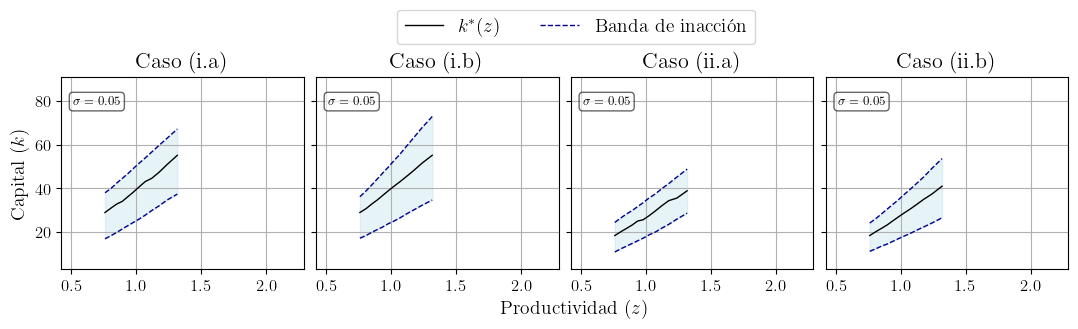

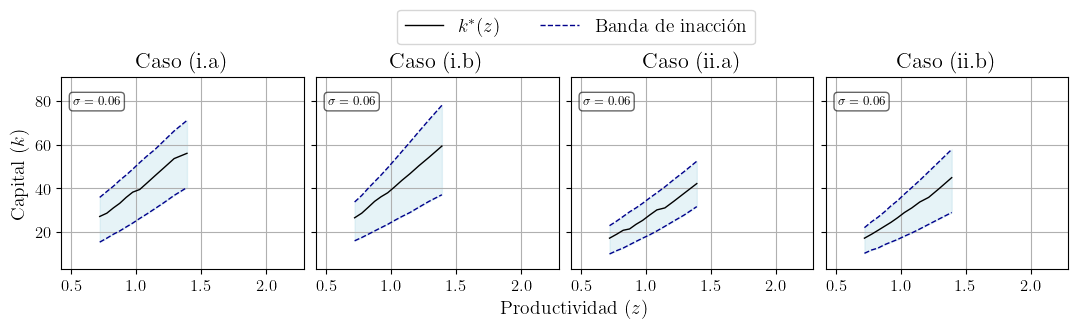

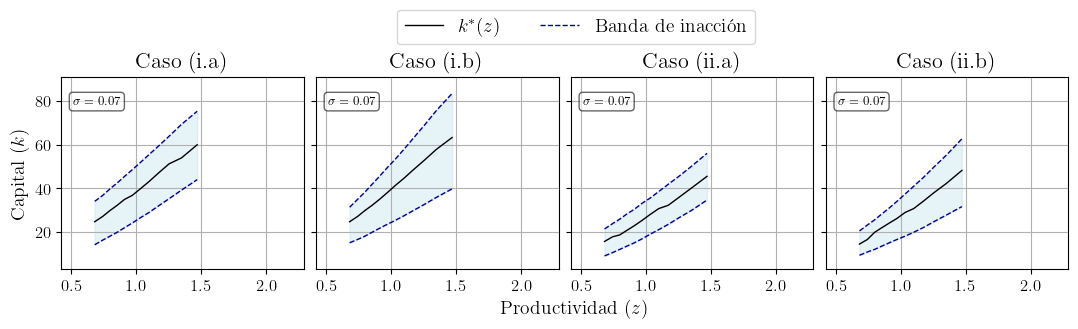

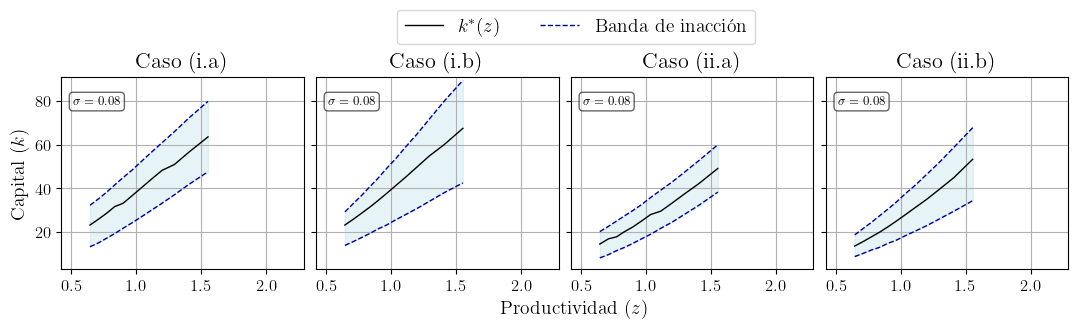

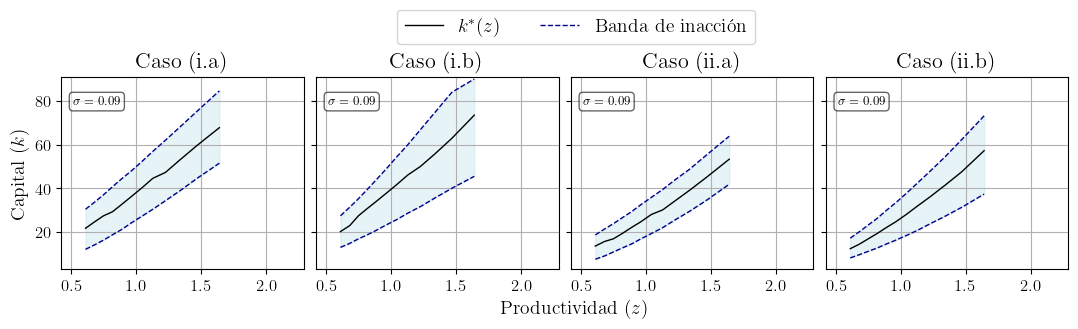

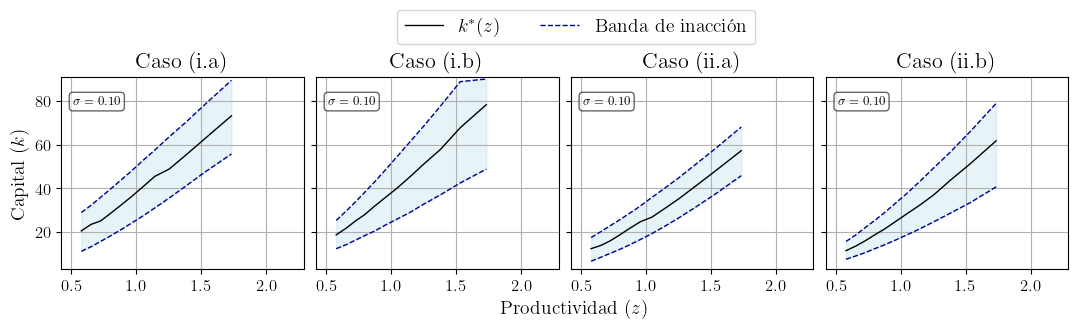

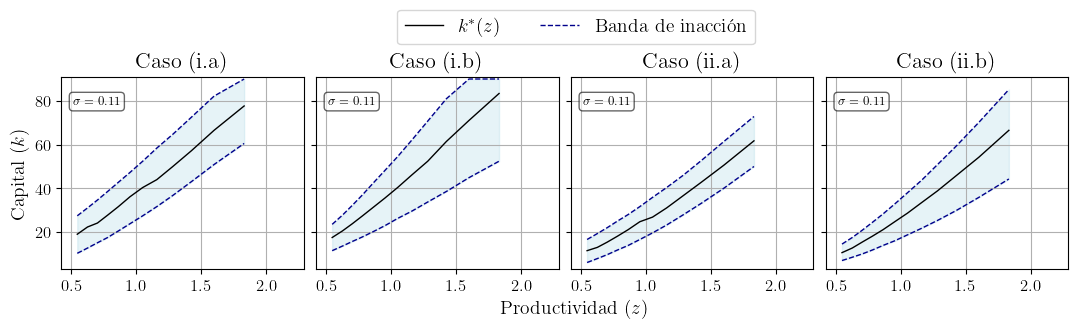

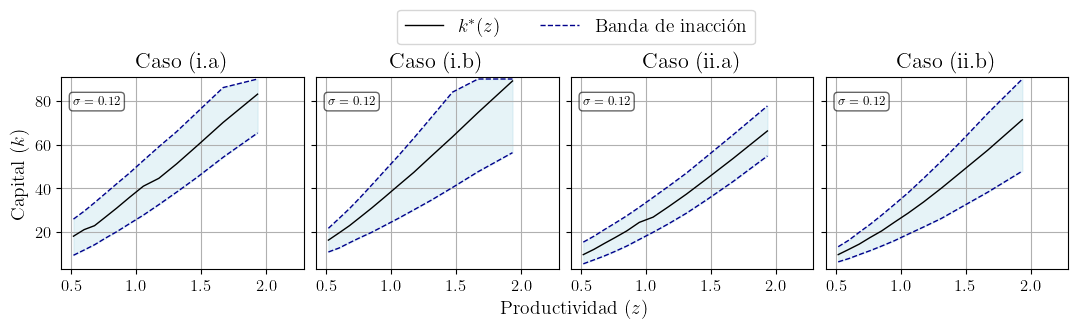

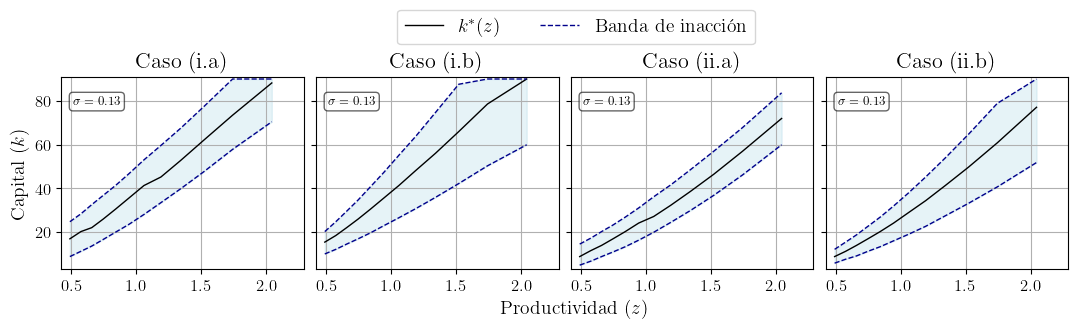

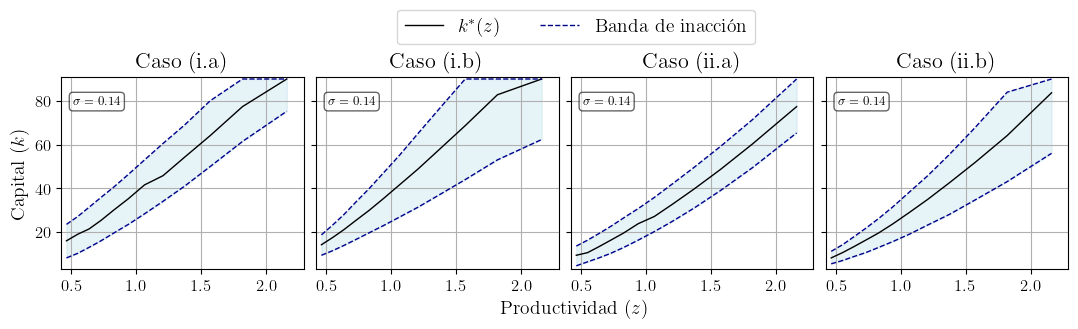

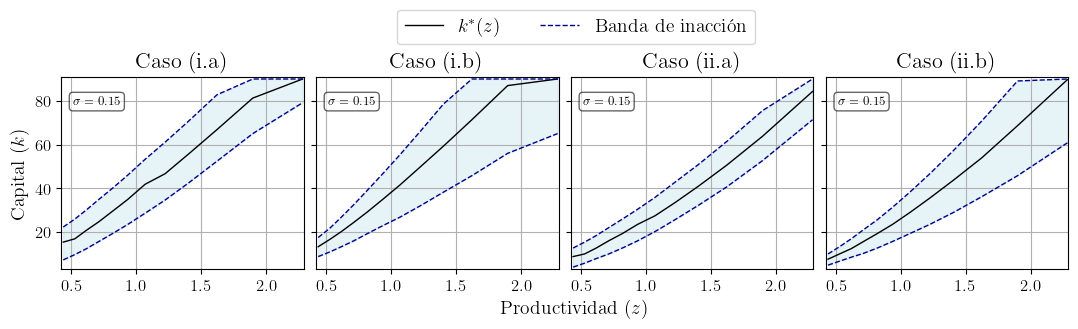

In [230]:
%%time
problem = 'p7'
folder = './backup/'+problem
policy_paths_ext = glob(os.path.join(folder, '*', '*.mat'))
sigma_groups = [policy_paths_ext[i:i+4] for i in range(0, len(policy_paths_ext), 4)]

foo_1 = []
foo_2 = []
titles = ['Caso (i.a)', 'Caso (i.b)', 'Caso (ii.a)', 'Caso (ii.b)']
for j, policy_paths in enumerate(sigma_groups):
    fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(13, 2.5), gridspec_kw={'wspace':0.05}, dpi=100)
    for i, path in enumerate(policy_paths):
        sigma_value = os.path.basename(os.path.dirname(path)).split('_')[-1]
        backup = loadmat(path)
        z = backup['z']
        foo_1.append(np.min(z))
        foo_2.append(z)
        axes[i].plot(z, backup['k_star'][0], color='k', label=r'$k^*(z)$', linewidth=1)
        axes[i].fill_between(z[:, 0], backup['k_lower'][:, 0], backup['k_upper'][:, 0], color='lightblue', alpha=0.3)

        # Líneas punteadas para min y max
        axes[i].plot(z, backup['k_lower'], linestyle='--', color='darkblue', linewidth=1)
        axes[i].plot(z, backup['k_upper'], linestyle='--', color='darkblue', linewidth=1, label='Banda de inacción')

        axes[i].set_title(titles[i])
        axes[i].grid()
        axes[i].text(0.05, 0.9, r'$\sigma = {}$'.format(sigma_value), transform=axes[i].transAxes,
                    fontsize=9, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.6))
        axes[i].set_ylim(3., 91.)
        axes[i].set_xlim(0.42, 2.29)

    axes[0].set_ylabel(r'Capital ($k$)')
    axes[2].legend(ncols=3, bbox_to_anchor=(0.8, 1.4))
    fig.text(0.463, -0.05, r'Productividad ($z$)', va='center', rotation='horizontal')
    fig.savefig("./figuras/p7_gif/{}_{}.png".format(problem, sigma_value), dpi=300, bbox_inches='tight', pad_inches=0)